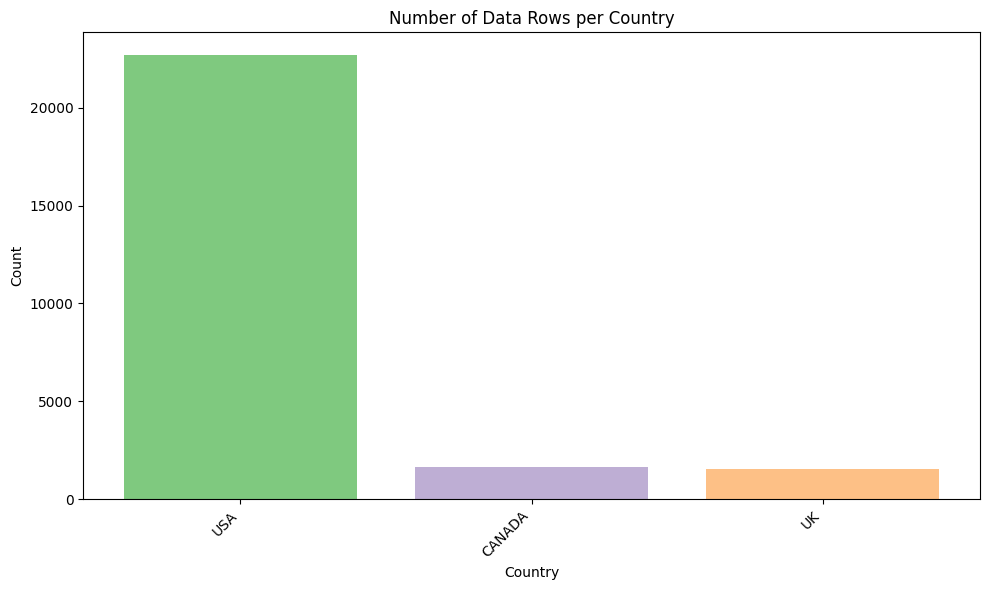

In [ ]:
#visualizing distribution of data across countries (how many data rows per country do we have)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cleandata.csv")

#count number of rows for each country
country_counts = df['workCountry'].value_counts()
countries = country_counts.index
counts = country_counts.values

#color code by country
colors = plt.cm.Accent.colors
color_list = colors[:len(countries)]

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=color_list)
plt.title("Number of Data Rows per Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-22-b83f634a9f45>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


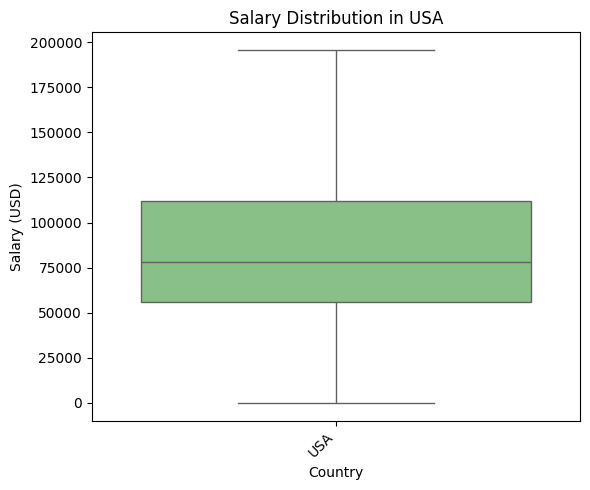

<ipython-input-22-b83f634a9f45>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


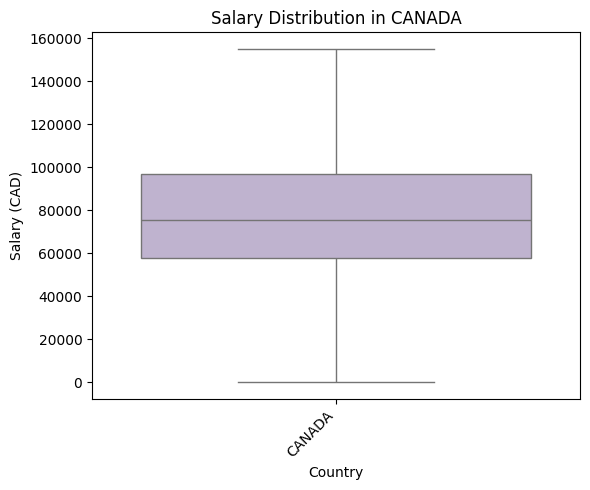

<ipython-input-22-b83f634a9f45>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


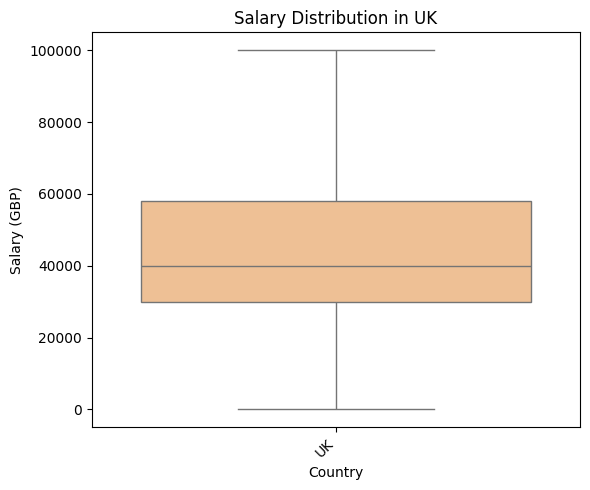

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("cleandata.csv")

df_filtered = df[df['annualSalary'] < 1_000_000]

selected_countries = ['USA', 'CANADA', 'UK']

palette = dict(zip(selected_countries, sns.color_palette("Accent", n_colors=len(selected_countries))))

for country in selected_countries:
    country_data = df_filtered[df_filtered['workCountry'] == country]


    currency_unit = country_data['currency'].mode()[0]

    plt.figure(figsize=(6, 5))
    sns.boxplot(
        data=country_data,
        x='workCountry',
        y='annualSalary',
        palette={country: palette[country]},
        showfliers=False
    )
    plt.title(f"Salary Distribution in {country}")
    plt.xlabel("Country")
    plt.ylabel(f"Salary ({currency_unit})")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


<ipython-input-1-b270cdadace0>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


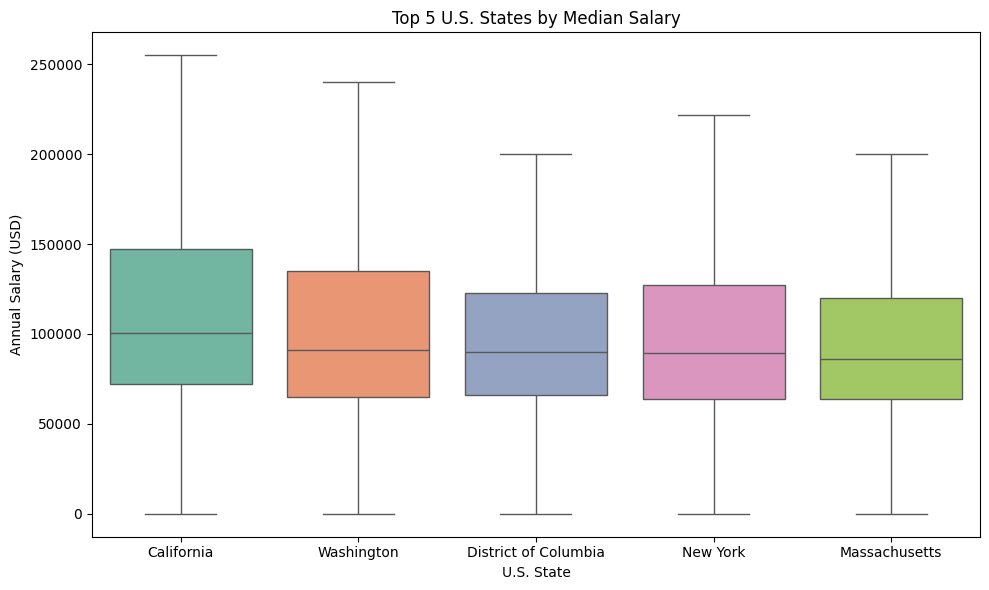

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cleandata.csv")

df_filtered = df[
    (df['workCountry'] == 'USA') &
    (df['annualSalary'] < 1_000_000) &
    (df['usState'].notna())
].copy()

df_filtered['usState'] = df_filtered['usState'].astype(str).str.split(',')
df_filtered = df_filtered.explode('usState')
df_filtered['usState'] = df_filtered['usState'].str.strip()


state_medians = df_filtered.groupby('usState')['annualSalary'].median().sort_values(ascending=False)
top_5_states = state_medians.head(5).index.tolist()
top5_df = df_filtered[df_filtered['usState'].isin(top_5_states)]


palette = dict(zip(top_5_states, sns.color_palette("Set2", n_colors=5)))


plt.figure(figsize=(10, 6))
sns.boxplot(
    data=top5_df,
    x='usState',
    y='annualSalary',
    order=top_5_states,
    palette=palette,
    showfliers=False
)

plt.title("Top 5 U.S. States by Median Salary")
plt.xlabel("U.S. State")
plt.ylabel("Annual Salary (USD)")
plt.tight_layout()
plt.show()


<ipython-input-3-930106100f17>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


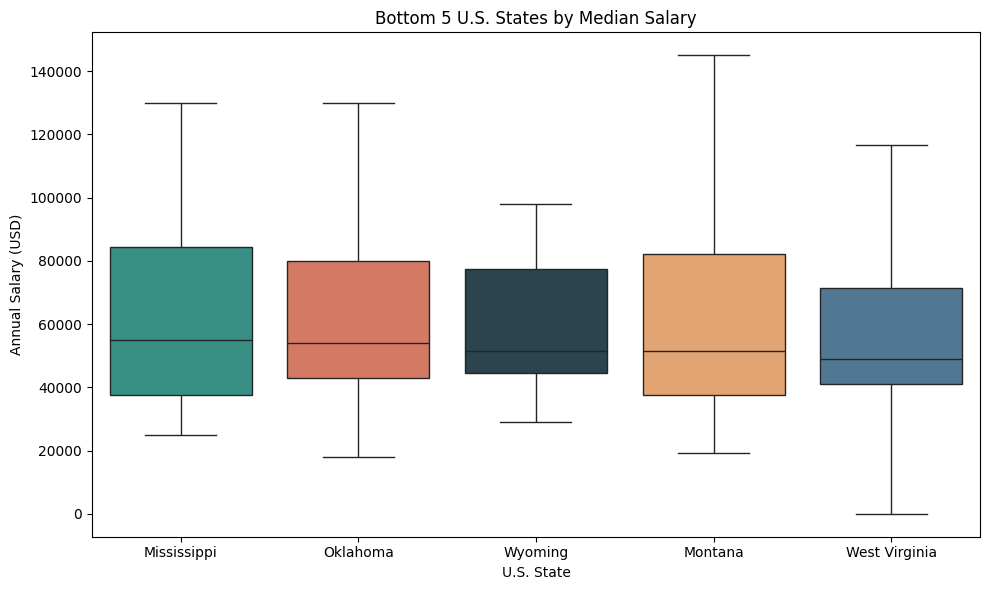

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("cleandata.csv")

df_filtered = df[
    (df['workCountry'] == 'USA') &
    (df['annualSalary'] < 1_000_000) &
    (df['usState'].notna())
].copy()


df_filtered['usState'] = df_filtered['usState'].astype(str).str.split(',')
df_filtered = df_filtered.explode('usState')
df_filtered['usState'] = df_filtered['usState'].str.strip()


state_medians = df_filtered.groupby('usState')['annualSalary'].median().sort_values(ascending=False)


bottom_5_states = state_medians.tail(5).index.tolist()


bottom5_df = df_filtered[df_filtered['usState'].isin(bottom_5_states)]


custom_colors = ["#2a9d8f", "#e76f51", "#264653", "#f4a261", "#457b9d"]
palette = dict(zip(bottom_5_states, custom_colors))


plt.figure(figsize=(10, 6))
sns.boxplot(
    data=bottom5_df,
    x='usState',
    y='annualSalary',
    order=bottom_5_states,
    palette=palette,
    showfliers=False
)

plt.title("Bottom 5 U.S. States by Median Salary")
plt.xlabel("U.S. State")
plt.ylabel("Annual Salary (USD)")
plt.tight_layout()
plt.show()
